<a href="https://colab.research.google.com/github/uervitonsantos/Atividade_Analise_Bayeseana_Com_RSTAN/blob/main/Atividade_Analise_Bayseana_Com_RSTAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Atividade de analise inferencial Bayseana com RStan aplicado em um conjundo de dados de confiabilidade de motores

Tutorial de referencia: https://ourcodingclub.github.io/tutorials/stan-intro/

Bayesian Model with RStan: https://www.kaggle.com/code/dhafer/bayesian-model-with-rstan


Fonte dos dados: https://www.kaggle.com/datasets/eduardopoleze/parmetros-operacionais-bombamotor-eltrico

Estatística Bayesiana com R e Stan. prof. José Eduardo Storopoli: https://www.youtube.com/watch?v=m_kJwaL2KHQ&list=PLpTXaEnTpmwNwBwwwLTDmCLekoUPtc0cP&index=10

Aula Inferência Bayesiana com prof. Gustavo Ferreira: https://www.youtube.com/watch?v=YKZ1euMRsbs&list=PL5nbzsxqG2FPrVmqbLafXqOrE3djThquN



In [1]:
%load_ext rpy2.ipython

In [ ]:
# Change 2 to however many cores you can/want to use to parallelize install
# If you experience crashes or run out RAM during installation, try changing this to 1
%%R
Sys.setenv(MAKEFLAGS = "-j2")
Sys.setenv("R_REMOTES_NO_ERRORS_FROM_WARNINGS" = "true")
remotes::install_github("stan-dev/rstanarm", INSTALL_opts = "--no-multiarch", force = TRUE)

In [ ]:
%%R
install.packages("gdata")

In [58]:
%%R
library(rstan) # observe startup messages
library(bayesplot)
library(ggplot2)
library(dplyr)
library(magrittr)
library(gdata)

In [ ]:
%%R
df <- read.csv("/content/drive/MyDrive/Colab Notebooks/DateSet/Motor_Bomba_1.csv", header = TRUE, sep = ";", dec = ",")
head(df)

In [61]:
%%R
names(df)

 [1] "Ano"                             "Dia"                            
 [3] "Temp..Estator.Fase.U"            "Temp..Estator.Fase.V"           
 [5] "Temp..Estator.Fase.WA"           "Temp..Estator.Fase.WB"          
 [7] "Vibração.Bomba.LA"               "Vazão.Bomba"                    
 [9] "Corrente"                        "Pressão.Desc."                  
[11] "Pressão.Suc"                     "Posição.FCV"                    
[13] "Temp..externo.mancal.escora.LNA" "Temp..interno.mancal.escora.LNA"
[15] "Pressão.Selo.LA"                 "Pressão.Selo.LNA"               
[17] "Temp..mancal.LA.bomba"           "Temp..mancal.LA.motor"          
[19] "Temp..mancal.LNA.bomba"          "Temp..mancal.LNA.motor"         
[21] "Temp..Oleo.ULF"                 


In [60]:
%%R
str(df)

'data.frame':	365 obs. of  21 variables:
 $ Ano                            : int  2016 2016 2016 2016 2016 2016 2016 2016 2016 2016 ...
 $ Dia                            : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Temp..Estator.Fase.U           : num  38.1 38.1 38.1 38 38 ...
 $ Temp..Estator.Fase.V           : num  39.9 39.9 39.9 39.8 39.8 ...
 $ Temp..Estator.Fase.WA          : num  36.6 36.6 36.6 36.5 36.5 ...
 $ Temp..Estator.Fase.WB          : num  38.8 38.8 38.8 38.7 38.7 ...
 $ Vibração.Bomba.LA              : num  0 0 0.0367 0 0 ...
 $ Vazão.Bomba                    : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Corrente                       : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Pressão.Desc.                  : num  0.203 0.203 0.203 0.203 0.203 ...
 $ Pressão.Suc                    : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Posição.FCV                    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Temp..externo.mancal.escora.LNA: num  20.7 20.7 20.7 20.7 20.7 ...
 $ Temp..interno.mancal.escora.LNA: num  21 21 21 21 20.9

In [62]:
%%R
lm1 <- lm(Temp..mancal.LA.motor ~ Dia, data = df)
summary(lm1)


Call:
lm(formula = Temp..mancal.LA.motor ~ Dia, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.6134 -3.1472  0.3514  3.8893  5.5081 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 24.124734   0.434141   55.57   <2e-16 ***
Dia          0.062544   0.002056   30.42   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.139 on 363 degrees of freedom
Multiple R-squared:  0.7183,	Adjusted R-squared:  0.7175 
F-statistic: 925.5 on 1 and 363 DF,  p-value: < 2.2e-16



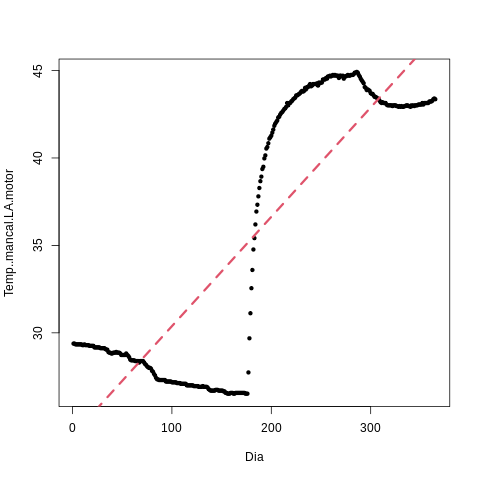

In [63]:
%%R
plot(Temp..mancal.LA.motor ~ Dia, pch = 20, data = df)
abline(lm1, col = 2, lty = 2, lw = 3)

In [64]:
%%R
x <- I(df$Dia - 01)
y <- df$Temp..mancal.LA.motor
N <- length(df$Dia)

In [65]:
%%R
lm1 <- lm(y ~ x)
summary(lm1)


Call:
lm(formula = y ~ x)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.6134 -3.1472  0.3514  3.8893  5.5081 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 24.187279   0.432361   55.94   <2e-16 ***
x            0.062544   0.002056   30.42   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.139 on 363 degrees of freedom
Multiple R-squared:  0.7183,	Adjusted R-squared:  0.7175 
F-statistic: 925.5 on 1 and 363 DF,  p-value: < 2.2e-16



In [66]:
%%R
lm_alpha <- summary(lm1)$coeff[1]  # the intercept
lm_beta <- summary(lm1)$coeff[2]  # the slope
lm_sigma <- sigma(lm1)  # the residual error

In [67]:
%%R
stan_data <- list(N = N, x = x, y = y)

In [70]:
%%R
write("// Stan model for simple linear regression

data {
 int < lower = 1 > N; // Sample size
 vector[N] x; // Predictor
 vector[N] y; // Outcome
}

parameters {
 real alpha; // Intercept
 real beta; // Slope (regression coefficients)
 real < lower = 0 > sigma; // Error SD
}

model {
 y ~ normal(alpha + x * beta , sigma);
}

generated quantities {
} // The posterior predictive distribution",

"stan_model1.stan")

In [ ]:
%%R
stanc("stan_model1.stan")

In [72]:
%%R
stan_model1 <- "stan_model1.stan"

In [73]:
%%R
fit <- stan(file = stan_model1, data = stan_data, warmup = 500, iter = 1000, chains = 4, cores = 2, thin = 1)

In [76]:
%%R
fit

Inference for Stan model: anon_model.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

         mean se_mean   sd    2.5%     25%     50%     75%   97.5% n_eff Rhat
alpha   24.18    0.01 0.44   23.34   23.89   24.18   24.47   25.06   873 1.01
beta     0.06    0.00 0.00    0.06    0.06    0.06    0.06    0.07  1049 1.00
sigma    4.16    0.01 0.15    3.88    4.05    4.16    4.26    4.48   756 1.01
lp__  -700.02    0.05 1.22 -703.12 -700.57 -699.71 -699.14 -698.63   494 1.00

Samples were drawn using NUTS(diag_e) at Sun Oct 30 04:17:30 2022.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


In [ ]:
%%R
posterior <- extract(fit)
str(posterior)

In [ ]:
%%R
glm1 <- glm(formula = Ano ~ Dia + Temp..Estator.Fase.U + Temp..Estator.Fase.WA + offset(log(Temp..Oleo.ULF)),
            family = poisson(link = "log"),
            data = df)
summary(glm1)